# Transformada 2D de Fourier

Importamos las librerias necesarias

In [1]:
from __future__ import division             # hace que se utilice la división en punto flotante
import numpy as np                          
import matplotlib.pyplot as plt                                   
from numpy.fft import fft2, fftshift, ifft2 
%matplotlib inline 

Creamos una imagen de prueba

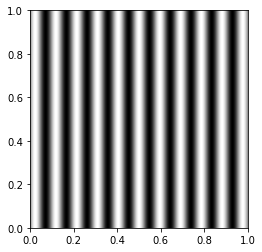

In [2]:
hW, hH = 600, 300    
hFrec = 10.5     

# Crea una malla en el cuadrado de dimensiones [0,1)x[0,1)
x = np.linspace( 0, 2*hW/(2*hW +1), 2*hW+1)     # columnas (Anchura)
y = np.linspace( 0, 2*hH/(2*hH +1), 2*hH+1)     # filas    (Altura)

[X,Y] = np.meshgrid(x,y)
A = np.sin(hFrec*2*np.pi*X)

plt.imshow(A, extent=[0,1,0,1], cmap ='gray');
H,W = np.shape(A)   # Dimensiones de la imagen A

Representamos un corte de la imagen

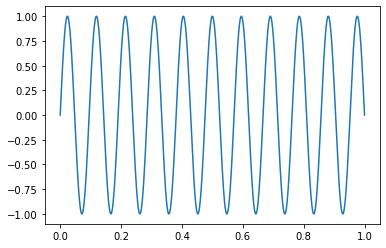

In [3]:
xx = np.linspace(0,1,1200)
plt.plot(xx,np.sin(hFrec*2*np.pi*xx))
# plt.plot(xx)
plt.show()

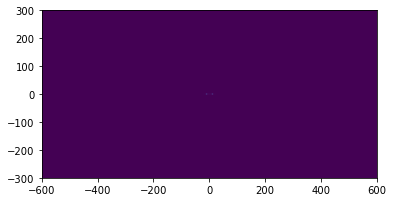

In [4]:
F = fft2(A)/(W*H)                          
F = fftshift(F)
P = np.abs(F)                            
plt.imshow(P, extent = [-hW,hW,-hH,hH]);

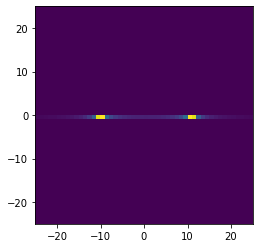

In [5]:
plt.imshow(P[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);

# Ahora con imagenes XD

Agregamos una libreria faltante

In [6]:
from PIL import Image

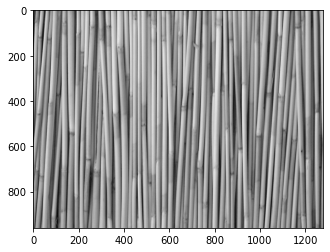

In [7]:
I = Image.open("canes.jpg")
I = I.convert('L')                      # 'L' para convertir a escala de grises
A3 = np.asarray(I, dtype = np.float32)  # Convertimos la imagen I en
                                        # un array Numpy A3 con elementos tipo float32
H,W = np.shape(A3)
plt.imshow(A3, cmap = 'gray');

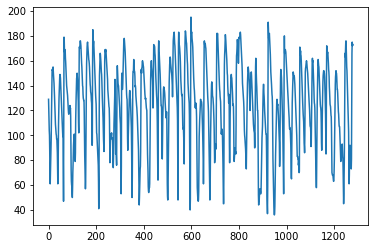

In [8]:
plt.plot(range(W), A3[int(H/2),:])
plt.show()

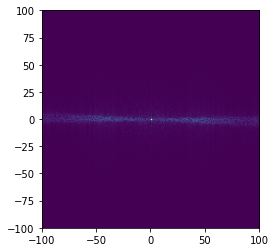

In [9]:
F3 = fft2(A3)/float(W*H)                          
F3 = fftshift(F3)
P3 = np.abs(F3)

r = 100
mW = int(np.fix(0.5*W))   # Entero que vale, aproximadamente, la mitad de W
mH = int(np.fix(0.5*H))   # Entero que vale, aproximadamente, la mitad de H
plt.figure()
plt.imshow(np.log(1+P3[mH-r:mH+r,mW-r:mW+r]), extent=[-r,r,-r,r]);

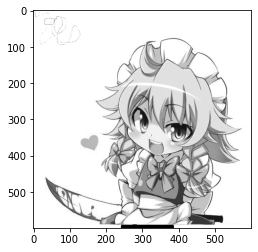

In [10]:
I = Image.open("prueba.png")
I = I.convert('L')                      
A3 = np.asarray(I, dtype = np.float32)  
                                        
H,W = np.shape(A3)
plt.imshow(A3, cmap = 'gray');

Representamos un corte de la imagen

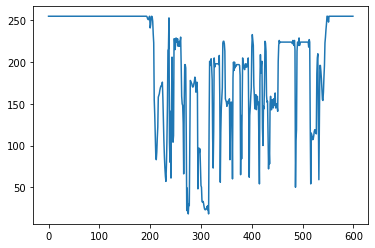

In [11]:
plt.plot(range(W), A3[int(H/2),:])
plt.show()

Realizamos la transformada de fourier

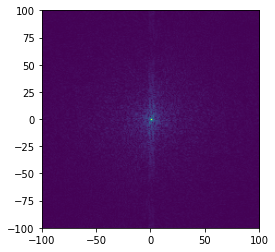

In [12]:
F3 = fft2(A3)/float(W*H)                          
F3 = fftshift(F3)
P3 = np.abs(F3)

r = 100
mW = int(np.fix(0.5*W))
mH = int(np.fix(0.5*H))   
plt.figure()
plt.imshow(np.log(1+P3[mH-r:mH+r,mW-r:mW+r]), extent=[-r,r,-r,r]);

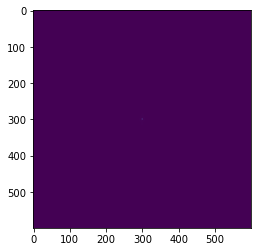

In [13]:
plt.imshow(P3)

In [14]:
P3

array([[0.01740057, 0.00454448, 0.01885478, ..., 0.00944408, 0.01258331,
        0.01525099],
       [0.01166138, 0.01349411, 0.01571334, ..., 0.01515967, 0.01467429,
        0.01086666],
       [0.00801518, 0.01454233, 0.01143982, ..., 0.00749941, 0.01359835,
        0.01336319],
       ...,
       [0.00801518, 0.01336319, 0.01359835, ..., 0.00509303, 0.01143982,
        0.01454233],
       [0.01166138, 0.01086666, 0.01467429, ..., 0.00922457, 0.01571334,
        0.01349411],
       [0.01740057, 0.01525099, 0.01258331, ..., 0.01407227, 0.01885478,
        0.00454448]])